In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brexit-opinion-poll-2023/brexit-opinion-poll.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Data processing:

In [3]:
df=pd.read_csv('/kaggle/input/brexit-opinion-poll-2023/brexit-opinion-poll.csv')

In [4]:
df.head()

,Date,Right_to_leave,Wrong_to_leave,Dont_Know
0,1/26/2020,40%,47%,13%
1,2/2/2020,43%,46%,12%
2,2/10/2020,43%,44%,19%
3,4/17/2020,43%,44%,13%
4,5/6/2020,43%,44%,13%


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Date              0
Right_to_leave    0
Wrong_to_leave    0
Dont_Know         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            65 non-null     object
 1   Right_to_leave  65 non-null     object
 2   Wrong_to_leave  65 non-null     object
 3   Dont_Know       65 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB


In [8]:
df['Date']=df['Date'].astype('datetime64[ns]')
for i in ['Right_to_leave','Wrong_to_leave','Dont_Know']:
    df[i]=df[i].str.replace('%','')
    df[i]=df[i].astype('int')

In [9]:
df.head()

,Date,Right_to_leave,Wrong_to_leave,Dont_Know
0,2020-01-26,40,47,13
1,2020-02-02,43,46,12
2,2020-02-10,43,44,19
3,2020-04-17,43,44,13
4,2020-05-06,43,44,13


# Exploratory Data Analysis

In [10]:
right=df[['Date','Right_to_leave']]

In [11]:
right

,Date,Right_to_leave
0,2020-01-26,40
1,2020-02-02,43
2,2020-02-10,43
3,2020-04-17,43
4,2020-05-06,43
...,...,...
60,2022-11-09,32
61,2022-11-15,34
62,2022-11-22,34
63,2022-11-29,34


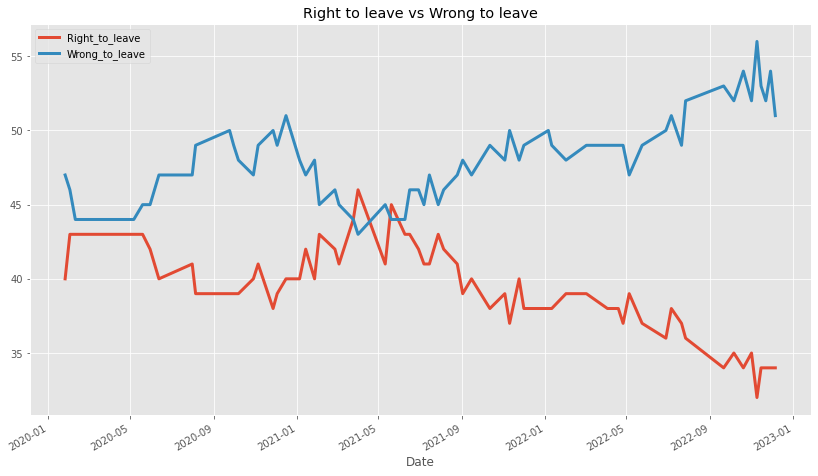

In [12]:
df.plot(kind='line',x='Date',y=['Right_to_leave','Wrong_to_leave'],lw=3,figsize=(14,8),title='Right to leave vs Wrong to leave')
plt.show()

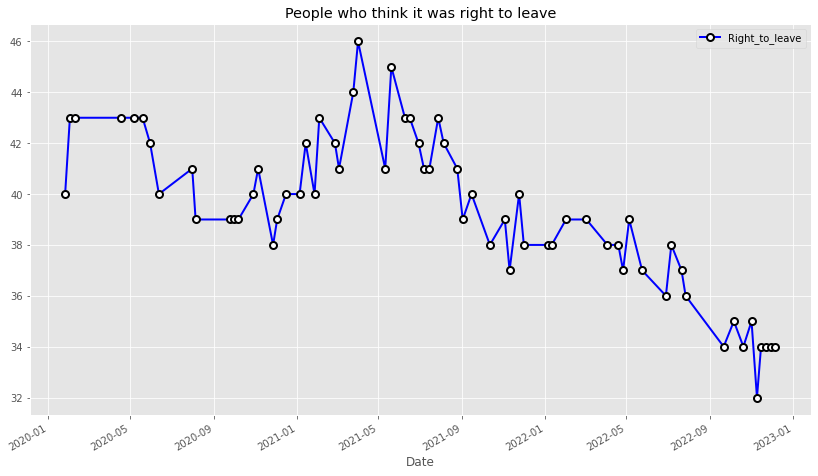

In [13]:
df.plot(color='blue',kind='line',x='Date',y='Right_to_leave',figsize=(14,8),title='People who think it was right to leave',marker="o",linewidth=2,markersize=7,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)
plt.show()

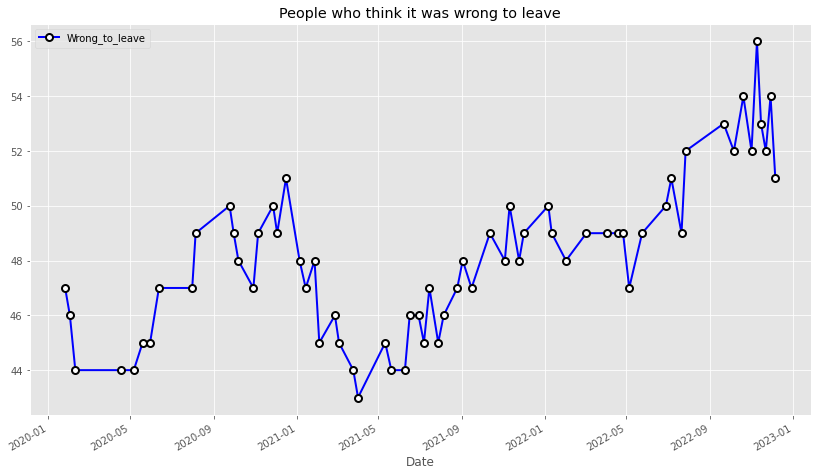

In [14]:
df.plot(color='blue',kind='line',x='Date',y='Wrong_to_leave',figsize=(14,8),title='People who think it was wrong to leave',marker="o",linewidth=2,markersize=7,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)
plt.show()

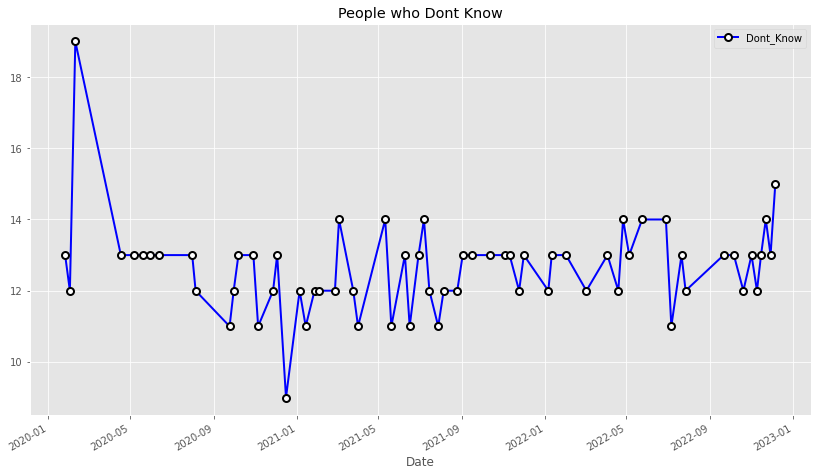

In [15]:
df.plot(color='blue',kind='line',x='Date',y='Dont_Know',figsize=(14,8),title='People who Dont Know',marker="o",linewidth=2,markersize=7,markerfacecolor="white",markeredgecolor="black",markeredgewidth=2)
plt.show()

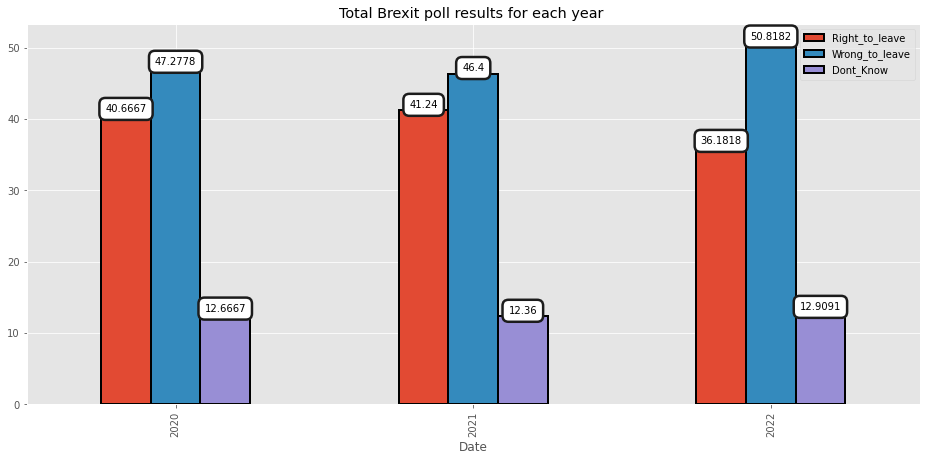

In [16]:
year=pd.pivot_table(df,index=pd.DatetimeIndex(df['Date']).year,values=['Right_to_leave','Wrong_to_leave','Dont_Know'],aggfunc='mean')
p=year.plot(kind='bar',y=['Right_to_leave','Wrong_to_leave','Dont_Know'],edgecolor='black',linewidth=2,figsize=(16,7),title='Total Brexit poll results for each year ')
p.bar_label(p.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p.bar_label(p.containers[1], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p.bar_label(p.containers[2], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})

plt.show()

array([<AxesSubplot:ylabel='None'>], dtype=object)

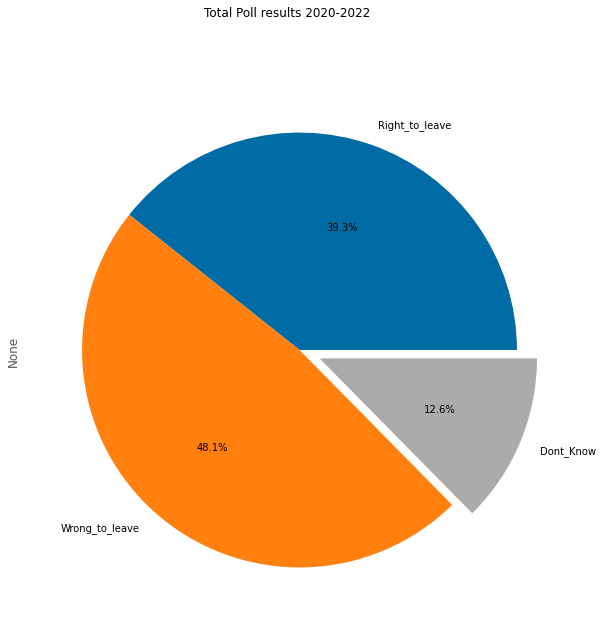

In [17]:
plt.style.use('tableau-colorblind10')
total=df[['Right_to_leave','Wrong_to_leave','Dont_Know']].sum(axis=0)
total.plot(kind='pie',labels = total.index,explode = [0,0,0.1],figsize=(14,10),subplots=True,autopct='%1.1f%%',title='Total Poll results 2020-2022')


In [18]:
df.corr()

,Right_to_leave,Wrong_to_leave,Dont_Know
Right_to_leave,1.000000,-0.937783,-0.179847
Wrong_to_leave,-0.937783,1.000000,-0.088282
Dont_Know,-0.179847,-0.088282,1.000000


In [19]:
df.head()

,Date,Right_to_leave,Wrong_to_leave,Dont_Know
0,2020-01-26,40,47,13
1,2020-02-02,43,46,12
2,2020-02-10,43,44,19
3,2020-04-17,43,44,13
4,2020-05-06,43,44,13


**I hope that you like it! Feel free to add some notes!**